In [33]:
import os, sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import mygene

In [2]:
module_path = os.path.abspath(os.path.join('..', 'bin'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from visualization import get_dimensions, get_row_col

In [4]:
pd.set_option('display.max_rows', 15,'display.max_columns',None)

## Import data

In [5]:
meta_file = '../data/intermediate_data/4DE/META_longitudinalTNF_nsamples_80.csv'
exp_file = '../data/intermediate_data/4DE/EXP_longitudinalTNF_nsamples_80.tsv'

In [6]:
DF = pd.read_csv(meta_file,index_col=0,sep=',',
                 usecols=['Experimental_ID','Unified_ID','Timeline','Response_ESR'])
DF

,Unified_ID,Response_ESR,Timeline
Experimental_ID,,,
ExBl026,P156,Responders,Baseline
ExBl027,P156,Responders,Followup
ExBl037,P242,Responders,Baseline
ExBl039,P140,Responders,Followup
ExBl047,P140,Responders,Baseline
...,...,...,...
ExBl646,P199,Responders,Followup
ExBl647,P133,Responders,Followup
ExBl663,P133,Responders,Baseline


In [7]:
DF['color'] = DF.loc[:,'Response_ESR'].replace({'Responders':'green','NonResponders':'red'})
DF

,Unified_ID,Response_ESR,Timeline,color
Experimental_ID,,,,
ExBl026,P156,Responders,Baseline,green
ExBl027,P156,Responders,Followup,green
ExBl037,P242,Responders,Baseline,green
ExBl039,P140,Responders,Followup,green
ExBl047,P140,Responders,Baseline,green
...,...,...,...,...
ExBl646,P199,Responders,Followup,green
ExBl647,P133,Responders,Followup,green
ExBl663,P133,Responders,Baseline,green


In [15]:
EXP = pd.read_csv(exp_file,index_col=0,sep='\t')
EXP

,ExBl026,ExBl027,ExBl037,ExBl039,ExBl047,ExBl071,ExBl072,ExBl073,ExBl082,ExBl083,ExBl099,ExBl101,ExBl106,ExBl109,ExBl116,ExBl117,ExBl130,ExBl133,ExBl160,ExBl161,ExBl170,ExBl171,ExBl172,ExBl173,ExBl190,ExBl191,ExBl212,ExBl214,ExBl216,ExBl217,ExBl225,ExBl226,ExBl272,ExBl273,ExBl311,ExBl313,ExBl328,ExBl335,ExBl336,ExBl337,ExBl361,ExBl362,ExBl393,ExBl394,ExBl397,ExBl400,ExBl404,ExBl426,ExBl454,ExBl455,ExBl467,ExBl468,ExBl474,ExBl480,ExBl529,ExBl539,ExBl540,ExBl549,ExBl550,ExBl552,ExBl559,ExBl560,ExBl573,ExBl576,ExBl593,ExBl596,ExBl605,ExBl606,ExBl607,ExBl608,ExBl610,ExBl611,ExBl612,ExBl640,ExBl641,ExBl646,ExBl647,ExBl663,ExBl664,ExBl665
ENSG00000278267,5,0,2,3,6,12,4,3,3,2,9,15,7,2,13,2,5,13,3,6,3,7,6,7,5,6,10,16,4,9,2,17,3,4,14,14,13,7,2,8,2,6,10,5,9,10,5,4,8,3,4,5,20,5,6,5,8,10,9,7,8,2,12,4,6,14,8,15,14,6,11,9,4,7,9,14,2,10,5,9
ENSG00000238009,32,11,45,37,115,19,9,22,5,9,52,13,23,3,58,24,20,63,3,18,22,16,8,13,15,41,32,28,26,0,19,14,13,6,64,22,11,9,25,30,11,7,16,40,21,121,7,5,18,14,53,18,12,6,37,15,16,9,23,20,17,33,51,21,34,12,51,54,98,29,35,15,38,9,5,49,9,13,2,5
ENSG00000239906,9,5,6,9,37,4,1,5,5,2,7,4,5,1,10,8,3,9,1,5,7,6,2,2,14,8,7,1,5,4,5,1,5,2,24,6,4,1,1,4,4,1,3,7,8,9,3,4,4,2,20,3,2,3,5,6,2,6,4,8,5,5,17,6,3,2,14,4,36,21,8,6,14,2,3,14,2,3,1,3
ENSG00000241860,84,45,114,94,249,46,24,61,65,27,168,91,59,18,161,84,38,148,14,34,82,82,28,46,52,143,161,91,117,69,61,55,74,22,222,93,100,73,51,108,53,20,102,135,120,239,53,27,78,87,165,40,40,37,213,88,42,70,128,108,83,82,201,103,178,76,161,173,226,83,149,70,207,69,45,155,37,37,52,36
ENSG00000222623,6,1,0,0,9,0,0,1,0,0,0,0,0,0,11,4,1,3,1,1,0,0,1,2,2,3,4,1,2,1,0,3,0,0,0,0,0,0,0,5,1,0,0,0,2,2,0,0,0,1,3,2,1,0,4,1,4,4,1,5,0,0,2,5,2,2,6,8,10,5,1,0,8,5,0,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,24,49,9,33,38,78,19,16,11,28,2,9,4,7,10,7,17,19,11,23,14,12,12,4,11,17,23,38,13,62,16,14,247,2,13,24,36,21,16,111,344,784,14,8,26,23,102,37,15,14,16,1821,22,72,770,35,31,30,57,16,15,19,48,22,22,27,10,36,23,10,27,5,35,59,57,33,37,58,15,27
ENSG00000210194,1,3,0,1,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,1,0,0,0,2,2,2,5,0,0,32,0,0,1,1,0,0,9,47,111,0,0,1,0,3,1,0,0,0,254,3,5,42,2,6,3,0,0,1,0,4,1,0,1,0,2,0,0,4,0,6,4,2,1,0,1,0,0
ENSG00000198727,453,407,522,874,1464,931,1149,1086,425,315,297,274,230,199,608,344,349,854,269,877,343,1270,236,267,245,313,767,827,1128,507,565,799,849,569,643,1651,1378,799,376,517,416,563,462,500,867,735,592,777,426,646,807,763,1400,450,1895,648,1061,432,371,704,259,931,1358,407,510,886,964,1055,1231,443,762,759,764,1358,1030,766,1093,729,478,485
ENSG00000210195,28,5,32,69,81,105,17,61,53,27,12,10,6,9,6,1,7,23,11,23,9,18,15,4,24,12,4,5,4,2,5,12,11,4,20,26,74,32,96,55,56,47,36,40,22,24,16,33,60,31,19,16,39,28,26,97,37,59,30,19,10,22,37,47,24,40,33,51,82,43,41,24,17,173,79,73,77,124,36,44


## Selecting only DE genes

In [46]:
log2f = np.round(np.array([-1.482115,-1.339352,-1.255524,-1.249031,-1.228665,-1.196303,-1.160027,-1.075856,
         -1.04741,-1.000127]),2)
padj = [3.40E-03,3.83E-07,5.43E-04,5.22E-06,5.22E-06,1.24E-05,3.58E-03,
        2.97E-05,5.88E-06,4.15E-03]

In [17]:
ensembl = ['ENSG00000152463','ENSG00000274173','ENSG00000228278','ENSG00000229314',
         'ENSG00000154529','ENSG00000204936','ENSG00000281969','ENSG00000100985',
         'ENSG00000106714','ENSG00000146122']

In [18]:
EXP = EXP.loc[ensembl]
EXP

,ExBl026,ExBl027,ExBl037,ExBl039,ExBl047,ExBl071,ExBl072,ExBl073,ExBl082,ExBl083,ExBl099,ExBl101,ExBl106,ExBl109,ExBl116,ExBl117,ExBl130,ExBl133,ExBl160,ExBl161,ExBl170,ExBl171,ExBl172,ExBl173,ExBl190,ExBl191,ExBl212,ExBl214,ExBl216,ExBl217,ExBl225,ExBl226,ExBl272,ExBl273,ExBl311,ExBl313,ExBl328,ExBl335,ExBl336,ExBl337,ExBl361,ExBl362,ExBl393,ExBl394,ExBl397,ExBl400,ExBl404,ExBl426,ExBl454,ExBl455,ExBl467,ExBl468,ExBl474,ExBl480,ExBl529,ExBl539,ExBl540,ExBl549,ExBl550,ExBl552,ExBl559,ExBl560,ExBl573,ExBl576,ExBl593,ExBl596,ExBl605,ExBl606,ExBl607,ExBl608,ExBl610,ExBl611,ExBl612,ExBl640,ExBl641,ExBl646,ExBl647,ExBl663,ExBl664,ExBl665
ENSG00000152463,80,66,25,54,68,11,1,18,6,3,11,5,0,0,39,2,52,60,1,19,19,0,0,0,5,157,19,6,3,6,0,1,54,1,4,2,29,4,204,75,306,11,6,148,10,28,7,0,4,0,79,38,0,0,29,7,0,6,1,2,0,1,1,0,32,2,21,3,2,4,6,0,7,108,20,113,0,9,10,9
ENSG00000274173,110,100,119,81,154,46,18,25,86,22,50,13,13,3,127,27,61,171,17,18,125,7,51,4,22,80,104,33,32,10,12,8,38,4,43,15,8,15,126,55,92,19,22,42,21,33,37,7,51,23,34,14,11,6,164,247,26,15,37,48,161,53,92,34,79,15,378,27,70,13,5,1,198,266,104,67,18,120,33,11
ENSG00000228278,16,6,6,20,34,2,3,4,4,0,10,2,1,0,23,1,16,22,5,7,2,2,5,1,0,1,5,8,0,5,2,1,17,2,2,2,2,10,15,24,5,3,6,15,9,9,4,1,6,5,1,1,3,4,7,16,1,2,4,0,25,9,4,1,4,2,5,1,19,3,2,2,1,52,1,19,1,2,4,1
ENSG00000229314,467,299,133,253,374,285,65,32,91,11,143,109,37,3,130,53,295,595,79,76,42,3,62,8,7,30,210,56,24,22,22,39,142,22,66,27,39,57,349,282,207,83,152,195,97,163,84,38,83,24,22,16,17,22,124,139,24,26,18,32,178,66,47,20,71,17,126,166,188,47,118,36,38,474,59,592,24,70,41,18
ENSG00000154529,32,18,14,55,89,9,1,2,23,3,25,13,5,2,18,9,23,15,4,8,15,1,16,0,10,5,36,16,13,0,8,5,38,3,33,15,12,13,26,32,32,14,17,64,8,39,10,10,4,1,28,10,4,2,18,11,5,7,7,23,21,23,25,3,23,3,8,12,17,3,7,2,20,26,6,28,18,17,21,11
ENSG00000204936,220,152,140,167,720,148,35,52,138,30,34,4,19,4,48,9,89,98,116,143,59,12,61,27,16,85,57,20,11,39,22,19,396,39,96,23,20,12,71,49,123,78,29,491,101,301,90,8,65,123,210,52,7,16,73,207,49,17,49,7,727,164,94,41,518,98,1100,380,61,22,11,10,1942,51,11,641,26,83,50,44
ENSG00000281969,83,105,107,335,617,3,1,28,9,0,21,12,6,0,21,4,187,360,3,72,23,17,5,0,12,331,86,26,5,21,8,7,97,19,36,6,102,38,286,270,247,18,7,714,20,235,3,3,25,5,101,68,3,4,73,62,3,1,2,3,12,26,15,19,646,21,15,26,9,14,12,9,7,34,3,111,12,11,8,6
ENSG00000100985,1952,2778,2558,1963,7119,1514,253,1561,2147,304,2579,1731,806,43,4467,1068,4772,12193,1445,3323,3487,481,734,363,665,3002,3720,2402,1114,816,618,512,2825,844,1397,493,491,944,2742,2339,2694,741,2961,1802,1826,2180,2129,645,2362,710,936,870,241,253,1198,2813,339,440,2055,442,1991,563,2256,920,4566,1636,6333,3127,3917,1476,2596,243,3033,2216,1193,3383,1009,1431,1705,605
ENSG00000106714,2944,1464,343,2934,3822,1685,430,144,1382,367,1309,904,461,69,1262,622,1649,1958,420,766,1356,304,852,131,602,997,1801,1470,779,690,531,360,2193,135,2233,883,513,137,2890,1700,2815,1141,1588,4164,1390,3048,902,556,677,217,2049,415,219,231,1163,1028,664,1142,502,1109,2323,1976,2108,645,1697,569,870,374,1170,457,794,590,802,2382,637,1453,689,1482,994,244
ENSG00000146122,577,618,235,3249,3642,115,31,124,32,14,96,90,62,7,220,45,1840,1329,17,285,115,52,48,16,75,2095,512,212,52,182,78,48,1172,58,147,40,932,75,2827,1775,2231,133,55,4721,71,2070,47,22,220,45,906,275,36,18,151,118,34,58,40,19,82,101,55,55,1981,144,128,120,59,108,142,11,57,439,65,1315,67,43,44,34


In [19]:
mg = mygene.MyGeneInfo()
geneSyms = mg.querymany(ensembl , scopes='ensembl.gene', fields='symbol', species='human')
genes = [g['symbol'] if 'symbol' in g.keys() else g['query'] for g in geneSyms ]
translation = {ensembl[i]:genes[i] for i in range(len(genes)) }
translation

querying 1-10...done.
Finished.


{'ENSG00000152463': 'OLAH',
 'ENSG00000274173': 'ENSG00000274173',
 'ENSG00000228278': 'ORM2',
 'ENSG00000229314': 'ORM1',
 'ENSG00000154529': 'CNTNAP3B',
 'ENSG00000204936': 'CD177',
 'ENSG00000281969': 'ENSG00000281969',
 'ENSG00000100985': 'MMP9',
 'ENSG00000106714': 'CNTNAP3',
 'ENSG00000146122': 'DAAM2'}

In [21]:
EXP.rename(index=translation,inplace=True)
EXP

,ExBl026,ExBl027,ExBl037,ExBl039,ExBl047,ExBl071,ExBl072,ExBl073,ExBl082,ExBl083,ExBl099,ExBl101,ExBl106,ExBl109,ExBl116,ExBl117,ExBl130,ExBl133,ExBl160,ExBl161,ExBl170,ExBl171,ExBl172,ExBl173,ExBl190,ExBl191,ExBl212,ExBl214,ExBl216,ExBl217,ExBl225,ExBl226,ExBl272,ExBl273,ExBl311,ExBl313,ExBl328,ExBl335,ExBl336,ExBl337,ExBl361,ExBl362,ExBl393,ExBl394,ExBl397,ExBl400,ExBl404,ExBl426,ExBl454,ExBl455,ExBl467,ExBl468,ExBl474,ExBl480,ExBl529,ExBl539,ExBl540,ExBl549,ExBl550,ExBl552,ExBl559,ExBl560,ExBl573,ExBl576,ExBl593,ExBl596,ExBl605,ExBl606,ExBl607,ExBl608,ExBl610,ExBl611,ExBl612,ExBl640,ExBl641,ExBl646,ExBl647,ExBl663,ExBl664,ExBl665
OLAH,80,66,25,54,68,11,1,18,6,3,11,5,0,0,39,2,52,60,1,19,19,0,0,0,5,157,19,6,3,6,0,1,54,1,4,2,29,4,204,75,306,11,6,148,10,28,7,0,4,0,79,38,0,0,29,7,0,6,1,2,0,1,1,0,32,2,21,3,2,4,6,0,7,108,20,113,0,9,10,9
ENSG00000274173,110,100,119,81,154,46,18,25,86,22,50,13,13,3,127,27,61,171,17,18,125,7,51,4,22,80,104,33,32,10,12,8,38,4,43,15,8,15,126,55,92,19,22,42,21,33,37,7,51,23,34,14,11,6,164,247,26,15,37,48,161,53,92,34,79,15,378,27,70,13,5,1,198,266,104,67,18,120,33,11
ORM2,16,6,6,20,34,2,3,4,4,0,10,2,1,0,23,1,16,22,5,7,2,2,5,1,0,1,5,8,0,5,2,1,17,2,2,2,2,10,15,24,5,3,6,15,9,9,4,1,6,5,1,1,3,4,7,16,1,2,4,0,25,9,4,1,4,2,5,1,19,3,2,2,1,52,1,19,1,2,4,1
ORM1,467,299,133,253,374,285,65,32,91,11,143,109,37,3,130,53,295,595,79,76,42,3,62,8,7,30,210,56,24,22,22,39,142,22,66,27,39,57,349,282,207,83,152,195,97,163,84,38,83,24,22,16,17,22,124,139,24,26,18,32,178,66,47,20,71,17,126,166,188,47,118,36,38,474,59,592,24,70,41,18
CNTNAP3B,32,18,14,55,89,9,1,2,23,3,25,13,5,2,18,9,23,15,4,8,15,1,16,0,10,5,36,16,13,0,8,5,38,3,33,15,12,13,26,32,32,14,17,64,8,39,10,10,4,1,28,10,4,2,18,11,5,7,7,23,21,23,25,3,23,3,8,12,17,3,7,2,20,26,6,28,18,17,21,11
CD177,220,152,140,167,720,148,35,52,138,30,34,4,19,4,48,9,89,98,116,143,59,12,61,27,16,85,57,20,11,39,22,19,396,39,96,23,20,12,71,49,123,78,29,491,101,301,90,8,65,123,210,52,7,16,73,207,49,17,49,7,727,164,94,41,518,98,1100,380,61,22,11,10,1942,51,11,641,26,83,50,44
ENSG00000281969,83,105,107,335,617,3,1,28,9,0,21,12,6,0,21,4,187,360,3,72,23,17,5,0,12,331,86,26,5,21,8,7,97,19,36,6,102,38,286,270,247,18,7,714,20,235,3,3,25,5,101,68,3,4,73,62,3,1,2,3,12,26,15,19,646,21,15,26,9,14,12,9,7,34,3,111,12,11,8,6
MMP9,1952,2778,2558,1963,7119,1514,253,1561,2147,304,2579,1731,806,43,4467,1068,4772,12193,1445,3323,3487,481,734,363,665,3002,3720,2402,1114,816,618,512,2825,844,1397,493,491,944,2742,2339,2694,741,2961,1802,1826,2180,2129,645,2362,710,936,870,241,253,1198,2813,339,440,2055,442,1991,563,2256,920,4566,1636,6333,3127,3917,1476,2596,243,3033,2216,1193,3383,1009,1431,1705,605
CNTNAP3,2944,1464,343,2934,3822,1685,430,144,1382,367,1309,904,461,69,1262,622,1649,1958,420,766,1356,304,852,131,602,997,1801,1470,779,690,531,360,2193,135,2233,883,513,137,2890,1700,2815,1141,1588,4164,1390,3048,902,556,677,217,2049,415,219,231,1163,1028,664,1142,502,1109,2323,1976,2108,645,1697,569,870,374,1170,457,794,590,802,2382,637,1453,689,1482,994,244
DAAM2,577,618,235,3249,3642,115,31,124,32,14,96,90,62,7,220,45,1840,1329,17,285,115,52,48,16,75,2095,512,212,52,182,78,48,1172,58,147,40,932,75,2827,1775,2231,133,55,4721,71,2070,47,22,220,45,906,275,36,18,151,118,34,58,40,19,82,101,55,55,1981,144,128,120,59,108,142,11,57,439,65,1315,67,43,44,34


## Separating in Baselina and Followup

In [22]:
BAS = DF.loc[DF['Timeline']=='Baseline'].drop('Timeline',axis=1).sort_values('Unified_ID')
BAS = pd.concat([BAS,EXP.loc[:,BAS.index].transpose()],axis=1)
BAS

,Unified_ID,Response_ESR,color,OLAH,ENSG00000274173,ORM2,ORM1,CNTNAP3B,CD177,ENSG00000281969,MMP9,CNTNAP3,DAAM2
Experimental_ID,,,,,,,,,,,,,
ExBl225,P005,Responders,green,0,12,2,22,8,22,8,618,531,78
ExBl116,P006,Responders,green,39,127,23,130,18,48,21,4467,1262,220
ExBl311,P007,Responders,green,4,43,2,66,33,96,36,1397,2233,147
ExBl573,P062,Responders,green,1,92,4,47,25,94,15,2256,2108,55
ExBl549,P063,Responders,green,6,15,2,26,7,17,1,440,1142,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ExBl467,P232,Responders,green,79,34,1,22,28,210,101,936,2049,906
ExBl071,P233,Responders,green,11,46,2,285,9,148,3,1514,1685,115
ExBl160,P234,NonResponders,red,1,17,5,79,4,116,3,1445,420,17


In [23]:
FU = DF.loc[DF['Timeline']=='Followup'].drop('Timeline',axis=1).sort_values('Unified_ID')
FU = pd.concat([FU,EXP.loc[:,FU.index].transpose()],axis=1)
FU

,Unified_ID,Response_ESR,color,OLAH,ENSG00000274173,ORM2,ORM1,CNTNAP3B,CD177,ENSG00000281969,MMP9,CNTNAP3,DAAM2
Experimental_ID,,,,,,,,,,,,,
ExBl226,P005,Responders,green,1,8,1,39,5,19,7,512,360,48
ExBl117,P006,Responders,green,2,27,1,53,9,9,4,1068,622,45
ExBl313,P007,Responders,green,2,15,2,27,15,23,6,493,883,40
ExBl576,P062,Responders,green,0,34,1,20,3,41,19,920,645,55
ExBl550,P063,Responders,green,1,37,4,18,7,49,2,2055,502,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ExBl468,P232,Responders,green,38,14,1,16,10,52,68,870,415,275
ExBl072,P233,Responders,green,1,18,3,65,1,35,1,253,430,31
ExBl161,P234,NonResponders,red,19,18,7,76,8,143,72,3323,766,285


In [ ]:
fig,ax = plt.subplots(1,1,figsize=[8,8])
sc_b = ax.scatter(np.zeros_like(BAS[gene].values),
           BAS[gene].values,
           c=BAS['color'].values)
sc_f = ax.scatter(np.ones_like(FU[gene].values),
           FU[gene].values,
           c=FU['color'].values)
ax.set_xlim([-0.25,1.25])
ax.set_xticks([0,1])
ax.set_xticklabels(['Baseline','Followup'])
ax.set_ylabel('Counts')
for i in range(len(FU)):
    plt.plot( [0,1], [BAS.loc[:,gene].values[i], FU.loc[:,gene].values[i]],
             c='k',linewidth=0.5)
ax.legend()


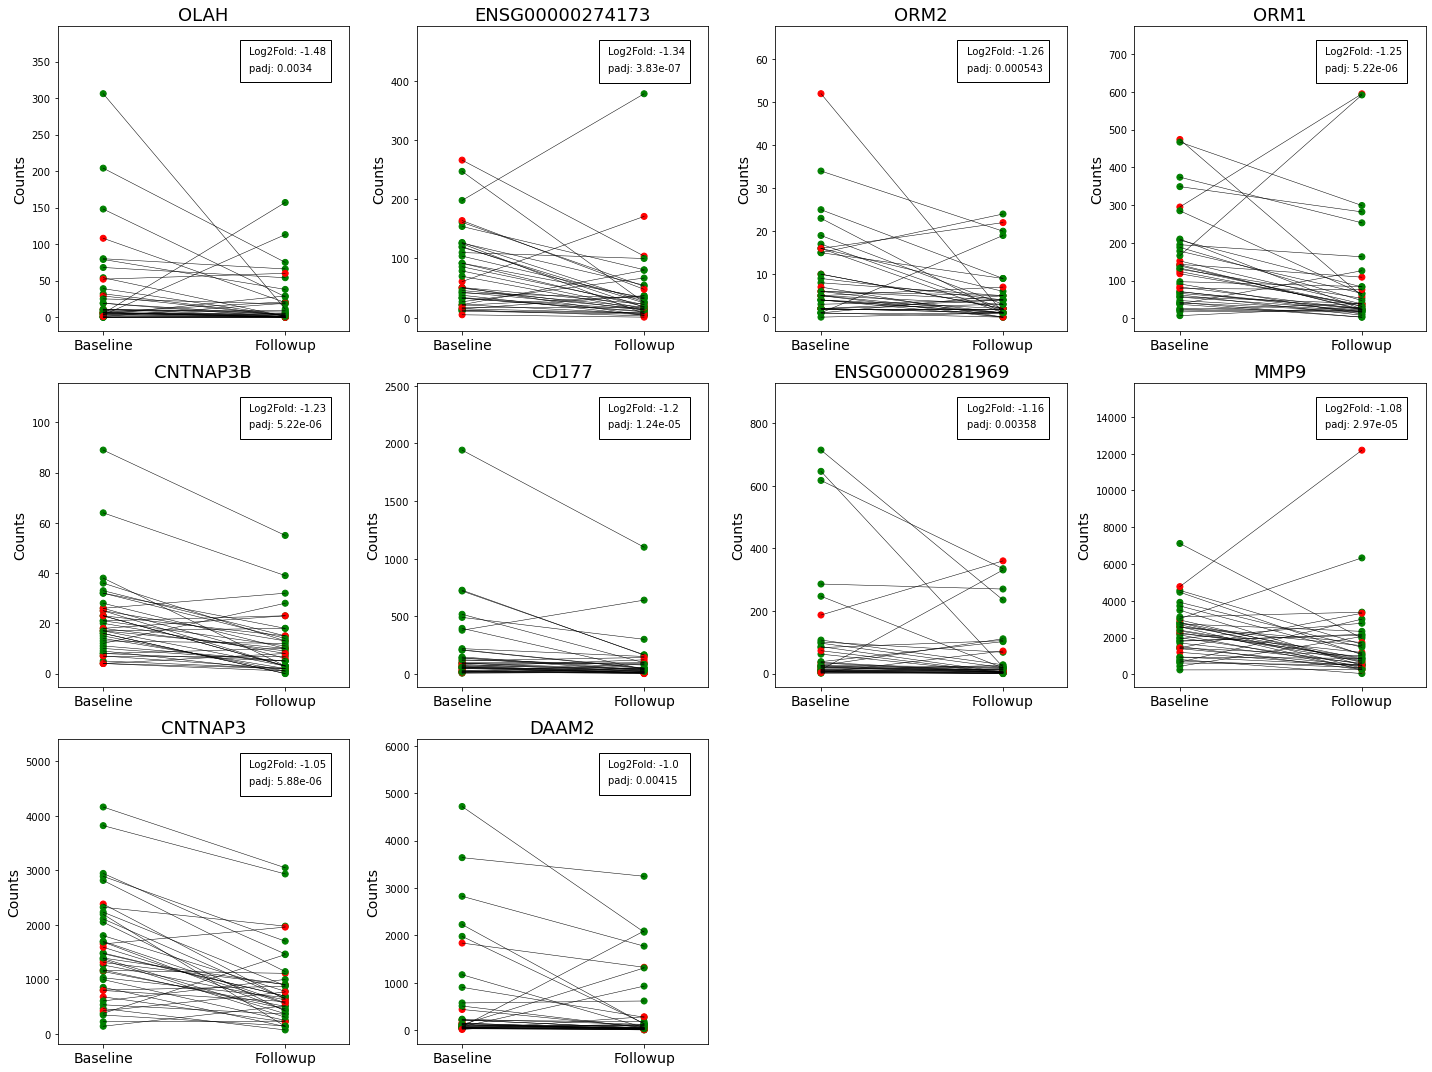

In [52]:
L = len(genes)
rows, cols = get_dimensions(L)
fig,ax = plt.subplots(rows,cols,figsize = [5*cols,5*rows])
for l in range(L):
    i,j = get_row_col(l,cols)
    gene = genes[l]
    ax[i,j].set_title(gene,fontsize=18)
    ax[i,j].set_xlim([-0.25,1.35])
    ax[i,j].set_xticks([0,1])
    ax[i,j].set_xticklabels(['Baseline','Followup'],fontsize=14)
    ax[i,j].set_ylabel('Counts',fontsize=14)
    ax[i,j].scatter(np.zeros_like(BAS[gene].values),
                      BAS[gene].values,
                      c=BAS['color'].values)
    ax[i,j].scatter(np.ones_like(FU[gene].values),
                      FU[gene].values,
                      c=FU['color'].values)
    ymax = ax[i,j].get_ylim()[1]
    ax[i,j].add_patch(patches.Rectangle(
        (0.75, ymax),
        0.5,
        0.18*ymax,linewidth=1, edgecolor='k', facecolor='none',
        fill=False) ) 
    ax[i,j].text(0.8,1.12*ymax,'Log2Fold: '+str(log2f[l]))
    ax[i,j].text(0.8,1.05*ymax,'padj: '+str(padj[l]))
    for h in range(len(FU)):
        ax[i,j].plot( [0,1], [BAS.loc[:,gene].values[h], FU.loc[:,gene].values[h]],
                 c='k',linewidth=0.5)

    
# Delete the unused plots
for k in range(rows*cols-L):
    plt.delaxes(ax[get_row_col(rows*cols-k-1,cols)])
fig.tight_layout()
plt.savefig('../results/figures/before-after.pdf')